### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [18]:
data = pd.read_csv('datasets_starter/coupons.csv')

In [19]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

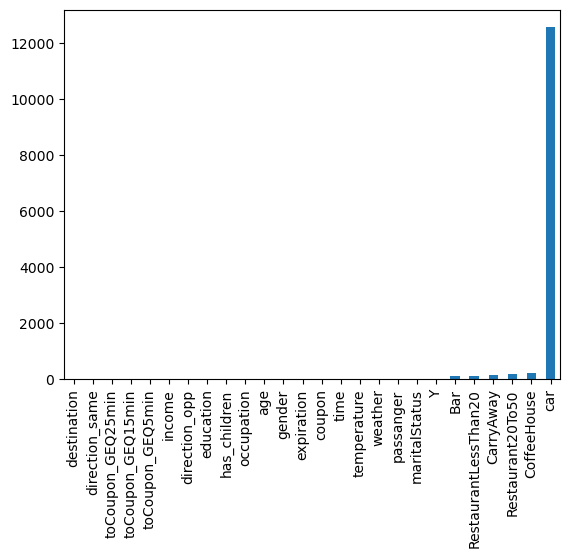

In [21]:
# Find columns with NaN content
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.savefig('images/missing_plot.png')
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [22]:
# Remove the 'car' column altogether given the information is very sparse, thus statistically not very meaningful 
# Remove all rows with NaN in any column 
# Combination of those reduces the number of entries from 12684 to 12079. This amounts to 4.8% drop. We could be missing some low probability events

data_clean_1=data.drop('car',axis=1)
data_clean = data_clean_1.dropna()
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [23]:
# Count all values in Y column 

x=data_clean.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print("Proportion of population that accepted a coupon = ",yes_proportion)

Proportion of population that accepted a coupon =  0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='Y'>

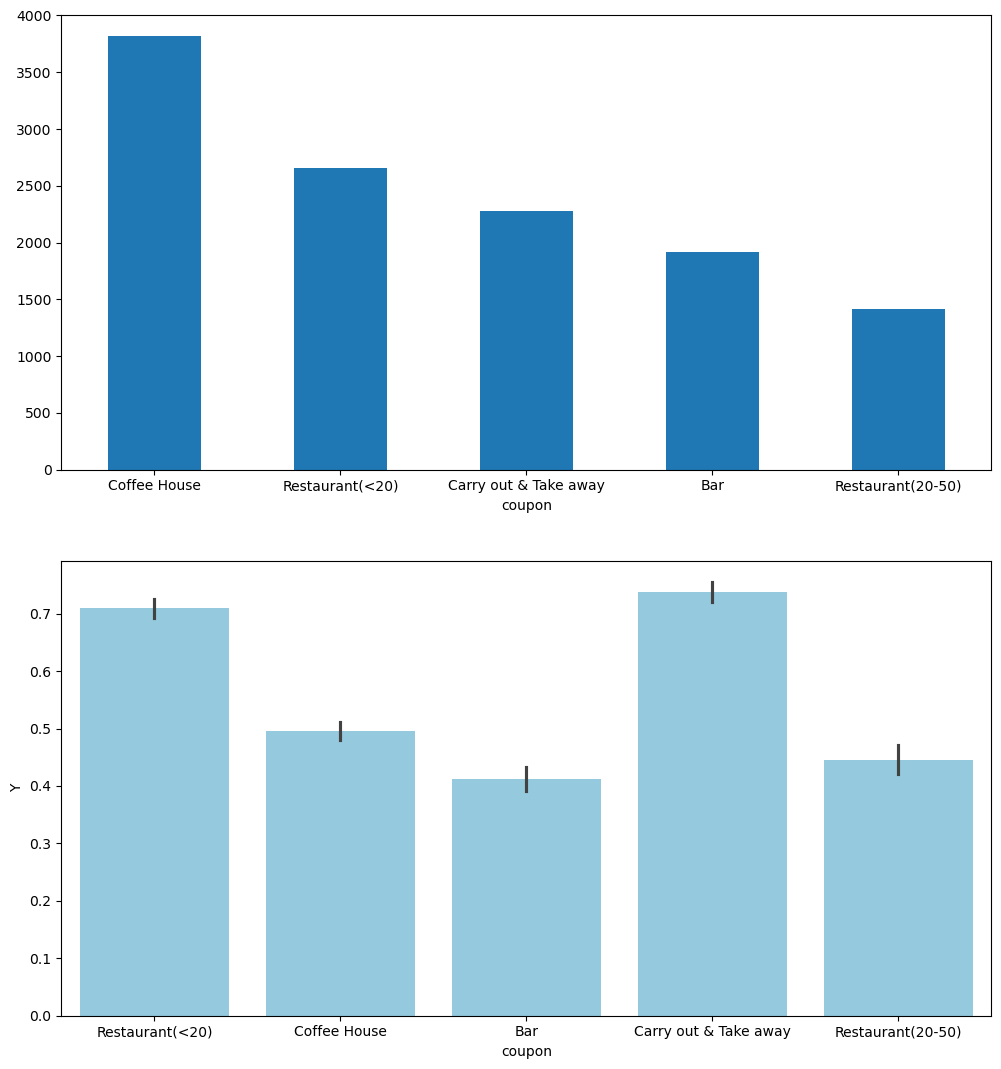

In [24]:
# Use Seaborn and Matplotlib in a 2x1 grid to generate count and bar plots

x=data_clean['coupon'].value_counts()
# print(x)
fig, axs = plt.subplots(2,1,figsize=(12, 13))
x.plot(kind='bar',ax=axs[0])
axs[0].tick_params(axis='x', labelrotation=0)
sns.barplot(data=data_clean, x="coupon",  y='Y',  color="skyblue",ax=axs[1])

6. Use a histogram to visualize the temperature column.

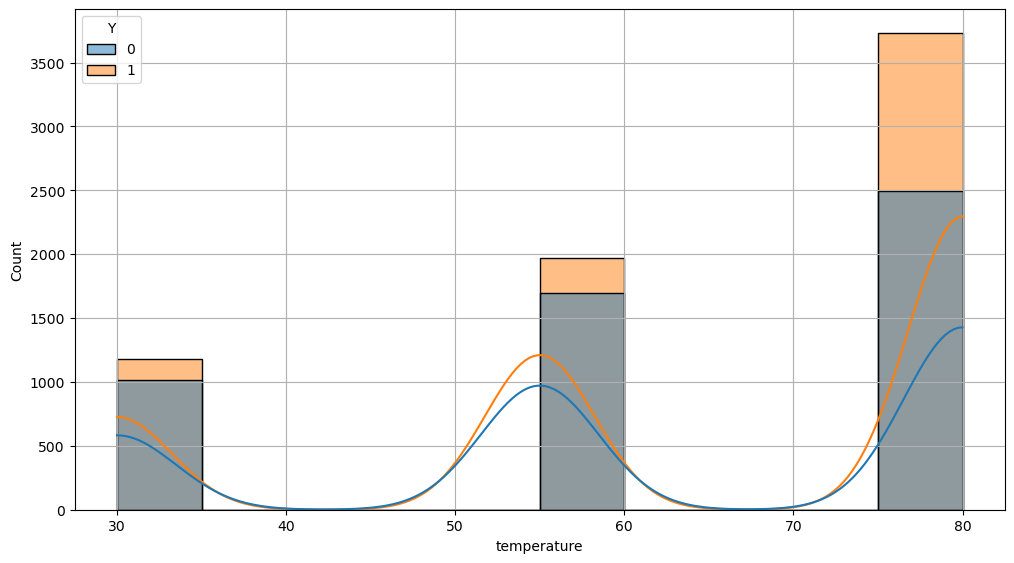

In [25]:
# Use Seaborn to genrate histograms

#ndata_clean['temperature'].hist()
plt.figure(figsize=(12, 6.5))
sns.histplot(data=data_clean, x='temperature', hue='Y', bins=10,color="skyblue", kde=True)
plt.grid(True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
# Un-comment to learn more about the data

filtered_data_bar= data_clean.query('coupon=="Bar"')
#filtered_data_bar.info()


2. What proportion of bar coupons were accepted?


In [27]:
x=filtered_data_bar.value_counts('Y', sort=False)
#print(x)
yes_proportion_bar=x[1]/(x[0]+x[1])
print(" Proportion of accecpted bar coupons = ",yes_proportion_bar)

 Proportion of accecpted bar coupons =  0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
# Un-comment to learn more about the data
#---- went to bar 3 times or less -----
filtered_data_bar1= filtered_data_bar.query('Bar=="never" or Bar=="less1" or Bar=="1~3"') 
#filtered_data_bar1.info()
x=filtered_data_bar1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: bar 3 or fewer times = ", yes_proportion)
#----- end of section

#---- went to bar 4 times or more -----
filtered_data_bar2= filtered_data_bar.query('Bar=="4~8" or Bar=="gt8"') 
#filtered_data_bar2.info()
x=filtered_data_bar2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: bar more than 3 times  = ", yes_proportion)
#----- end of section


Acceptance rate: bar 3 or fewer times =  0.37267441860465117
Acceptance rate: bar more than 3 times  =  0.7616580310880829


 <span style="color: rgb(0, 0, 255)">__Those who went to a bar more frequently have more than twice the acceptance rate compared to those who went less often.__</span>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
# Un-comment to learn more about the data

# First clean the age column and remove strings
data_age=filtered_data_bar.copy()
data_age['age'] = data_age['age'].replace('50plus', 51)
data_age['age'] = data_age['age'].replace('below21', 20)
data_age['age'] = data_age['age'].astype('int64')
#data_age.info()

#---- went to bar at least once and older than 25 -----
filtered_data_age1= data_age.query('( Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and age>25') 
#filtered_data_age.info()
x=filtered_data_age1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: over 25 and go to a bar at least once= ", yes_proportion)
#----- end of section

#---- all other cases -----
filtered_data_age2= data_age.query('Bar=="less1" or Bar=="never" or age<25') 
#filtered_data_age.info()
x=filtered_data_age2.value_counts('Y', sort=False)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: less than 25 or dont go to a bar= ", yes_proportion)
#----- end of section

Acceptance rate: over 25 and go to a bar at least once=  0.6898263027295285
Acceptance rate: less than 25 or dont go to a bar=  0.33774834437086093


 <span style="color: rgb(0, 0, 255)">__Yes, people over age of 25 and go to bar at least once have a higer propensity to accept a bar coupon by a wide margin__</span>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
# Un-comment to learn more about the data

#df=data_clean['passanger'].value_counts()
#print(df)
# df=data_clean['occupation'].value_counts()
# print(df)
#---- went to bar at least once -----
filtered_data_bar1= filtered_data_bar.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (passanger!="Kid(s)") and (occupation!="Farming Fishing & Forestry")')
#filtered_data_bar1.info()
x=filtered_data_bar1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: go to bar at least once, no kid passanger, not working in farming, fishing or forestry = ", yes_proportion)
#----- end of section

#---- went to bar less than once -----
filtered_data_bar2= filtered_data_bar.query('Bar=="less1" or Bar=="never" or passanger=="Kid(s)" or occupation=="Farming Fishing & Forestry"') 
#filtered_data_bar2.info()
x=filtered_data_bar2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: no bar going or have kids passerner or woking in farming, fishing or forestry = ", yes_proportion)
#----- end of section

Acceptance rate: go to bar at least once, no kid passanger, not working in farming, fishing or forestry =  0.7094339622641509
Acceptance rate: no bar going or have kids passerner or woking in farming, fishing or forestry =  0.29790310918293567


<span style="color: rgb(0, 0, 255)">__People who go to a bar at least once,  without minor passengers and not working in an outdoor occupation (farming, fishing or forestry) have more than twice the accptance rate comapred to all other people.__</span>

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
# Un-comment to learn more about the data

#df=filtered_data_bar['income'].value_counts()
#print(df)
#df=filtered_data_bar['maritalStatus'].value_counts()
#print(df)
#df=filtered_data_bar['RestaurantLessThan20'].value_counts()
#print(df)

#---- case 1 -----
filtered_data_bar1= filtered_data_bar.query('(Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and (passanger!="Kid(s)") and (maritalStatus!="Widowed")')
#filtered_data_bar1.info()
x=filtered_data_bar1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: go to bar at least once, no kid passanger, not widowed = ", yes_proportion)
#----- end of section

#---- case 2 -----
filtered_data_age2= data_age.query('( Bar=="1~3" or Bar=="4~8" or Bar=="gt8") and age<30') 
#filtered_data_age2.info()
x=filtered_data_age2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: under 30 that go at least once to a bar   = ", yes_proportion)
#----- end of section


#---- case 3 -----
filtered_data_age3= filtered_data_bar.query('( RestaurantLessThan20=="4~8" or RestaurantLessThan20=="gt8") and ( income=="$25000 - $37499" or income=="$12500 - $24999" or income=="$37500 - $49999" or income=="Less than $12500")') 
#filtered_data_age3.info()
x=filtered_data_age3.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: cheap restaurents more 4 times and less 50K income= ", yes_proportion)
#----- end of section

Acceptance rate: go to bar at least once, no kid passanger, not widowed =  0.7094339622641509
Acceptance rate: under 30 that go at least once to a bar   =  0.7195121951219512
Acceptance rate: cheap restaurents more 4 times and less 50K income=  0.45645645645645644


<span style="color: rgb(0, 0, 255)">__People who go to a bar at least once,  without minor passengers and not widowed have almost 70% chance of accepting a bar coupon. The acceptance rate is roughly the same for those under 30 who go to a bar at least once a month. However, going to inexpensive restaurants combined with less $50K income reduces the acceptance rate to below 50%.__</span>

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<span style="color: rgb(0, 0, 255)">__Acceptance rate of bar coupons was over 70% if a driver went to a bar at least once a week.  The acceptance rate was not a strong function of age, occupation or marital status. The data indicated that having a minor passenger could be a strong factor in accepting a bar coupon. Financial status of a driver (cost of going to restaurants and income) was another strong factor in determining the acceptance rate.__</span>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [32]:
# Un-comment to learn more about the data

filtered_data_cota= data_clean.query('coupon=="Carry out & Take away"')
#filtered_data_cota.info()
x=filtered_data_cota.value_counts('Y', sort=False)
#print(x)
yes_proportion_bar=x[1]/(x[0]+x[1])
print("Proportion of accecpted CoTa (Carry out & Take away) coupons = ",yes_proportion_bar)

#df=data_clean['CarryAway'].value_counts()
#print(df)

#---- went to bar 3 times or less -----
filtered_data_cota1= filtered_data_cota.query('CarryAway=="never" or CarryAway=="less1" or CarryAway=="1~3"') 
#filtered_data_cota1.info()
x=filtered_data_cota1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: CoTa 3 or fewer times = ", yes_proportion)
#----- end of section

#---- went to bar 4 times or more -----
filtered_data_cota2= filtered_data_cota.query('CarryAway=="4~8" or CarryAway=="gt8"') 
#filtered_data_cota2.info()
x=filtered_data_cota2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: CoTa more than 3 times = ", yes_proportion)
#----- end of section

# First clean the age column and remove strings
data_age=filtered_data_cota.copy()
data_age['age'] = data_age['age'].replace('50plus', 51)
data_age['age'] = data_age['age'].replace('below21', 20)
data_age['age'] = data_age['age'].astype('int64')
#data_age.info()

#---- Cota at least once and older than 25 -----
filtered_data_cota1= data_age.query('( CarryAway=="1~3" or CarryAway=="4~8" or CarryAway=="gt8") and age>25') 
#filtered_data_cota.info()
x=filtered_data_cota1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: over 25 and CoTa at least once= ", yes_proportion)
#----- end of section

#---- all other cases -----
filtered_data_cota2= data_age.query('CarryAway=="less1" or CarryAway=="never" or age<25') 
#filtered_data_cota.info()
x=filtered_data_cota2.value_counts('Y', sort=False)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: less than 25 or no CoTa= ", yes_proportion)
#----- end of section

#---- went to bar at least once -----
filtered_data_cota1= filtered_data_cota.query('(CarryAway=="1~3" or CarryAway=="4~8" or CarryAway=="gt8") and (passanger!="Kid(s)") and (occupation!="Farming Fishing & Forestry")')
#filtered_data_cota1.info()
x=filtered_data_cota1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: Cota  at least once, no kid passanger, not working in farming, fishing or forestry = ", yes_proportion)
#----- end of section

#---- went to bar less than once -----
filtered_data_cota2= filtered_data_cota.query('CarryAway=="less1" or CarryAway=="never" or passanger=="Kid(s)" or occupation=="Farming Fishing & Forestry"') 
#filtered_data_cota2.info()
x=filtered_data_cota2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: no Cota  or have kids passerner or woking in farming, fishing or forestry = ", yes_proportion)
#----- end of section

#---- case 1 -----
filtered_data_cota1= filtered_data_cota.query('(CarryAway=="1~3" or CarryAway=="4~8" or CarryAway=="gt8") and (passanger!="Kid(s)") and (maritalStatus!="Widowed")')
#filtered_data_cota1.info()
x=filtered_data_cota1.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: Cota at least once, no kid passanger, not widowed = ", yes_proportion)
#----- end of section

#---- case 2 -----
filtered_data_cota2= data_age.query('( CarryAway=="1~3" or CarryAway=="4~8" or CarryAway=="gt8") and age<30') 
#filtered_data_cota2.info()
x=filtered_data_cota2.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: under 30 that Cota least once= ", yes_proportion)
#----- end of section


#---- case 3 -----
filtered_data_cota3= filtered_data_cota.query('( RestaurantLessThan20=="4~8" or RestaurantLessThan20=="gt8") and ( income=="$25000 - $37499" or income=="$12500 - $24999" or income=="$37500 - $49999" or income=="Less than $12500")') 
#filtered_data_cota3.info()
x=filtered_data_cota3.value_counts('Y', sort=False)
#print(x)
yes_proportion=x[1]/(x[0]+x[1])
print( "Acceptance rate: cheap restaurents more 4 times and less 50K income= ", yes_proportion)
#----- end of section

Proportion of accecpted CoTa (Carry out & Take away) coupons =  0.737719298245614
Acceptance rate: CoTa 3 or fewer times =  0.723563696919234
Acceptance rate: CoTa more than 3 times =  0.7534754402224282
Acceptance rate: over 25 and CoTa at least once=  0.7522743177046886
Acceptance rate: less than 25 or no CoTa=  0.7132784958871915
Acceptance rate: Cota  at least once, no kid passanger, not working in farming, fishing or forestry =  0.7501394311210262
Acceptance rate: no Cota  or have kids passerner or woking in farming, fishing or forestry =  0.6919917864476386
Acceptance rate: Cota at least once, no kid passanger, not widowed =  0.7488738738738738
Acceptance rate: under 30 that Cota least once=  0.7369020501138952
Acceptance rate: cheap restaurents more 4 times and less 50K income=  0.7672209026128266


<span style="color: rgb(0, 0, 255)">__Acceptance rate for Carry Out and Take away ( CoTa) coupon was 73.8%, which was  significantly higher than bar coupon acceptance rate. The history of using CoTa had a small influence on accepting a coupon of that type (less then 3% improvement). Similarly, factors such as age, marital status, age, passenger type and occupation had a weak impact on acceptance rate of Cota coupon acceptance. Interestingly, even financial status of a driver had a small impact on acceptance rate with people with income less than $50K only had 3% higher acceptance rate compared to all others.__</span>